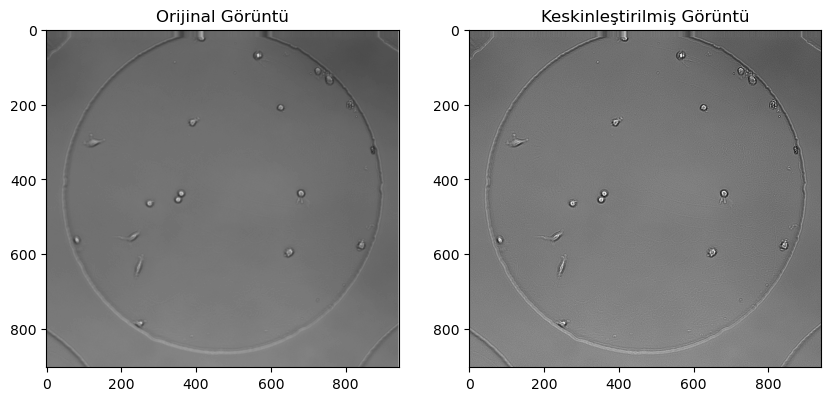

In [52]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Görüntüyü oku
image_path = "C:/Users/bgurd/hucre.png"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 1.Adım: Keskinleştirme işlemi uygula
kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharp_image = cv2.filter2D(original_image, -1, kernel=kernel)

# Görüntüleri göster
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(original_image, cmap='gray'), plt.title('Orijinal Görüntü')
plt.subplot(1, 2, 2), plt.imshow(sharp_image, cmap='gray'), plt.title('Keskinleştirilmiş Görüntü')
plt.show()


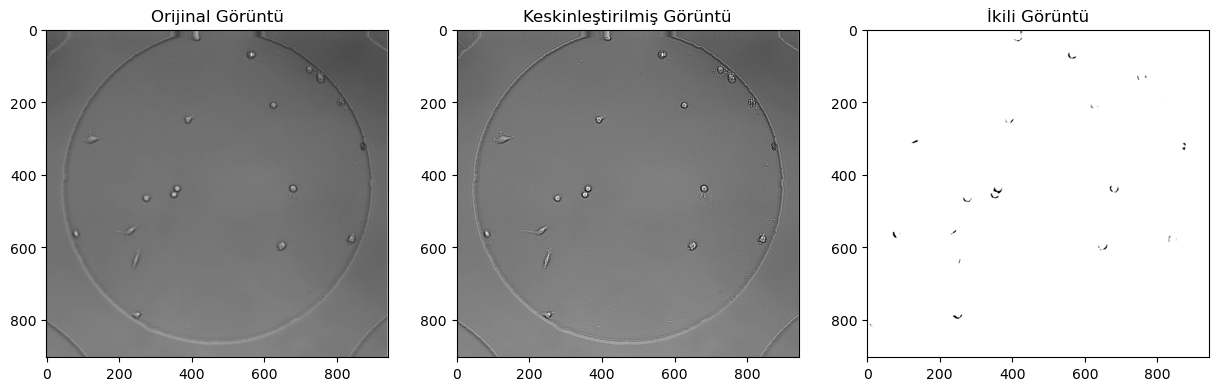

In [53]:
# 2.Adım: Eşikleme işlemi uygula
blurred_image = cv2.GaussianBlur(sharp_image, (29, 29), 0)
binary_image = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,15,3)


# Görüntüleri göster
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.imshow(original_image, cmap='gray'), plt.title('Orijinal Görüntü')
plt.subplot(1, 3, 2), plt.imshow(sharp_image, cmap='gray'), plt.title('Keskinleştirilmiş Görüntü')
plt.subplot(1, 3, 3), plt.imshow(binary_image, cmap='gray'), plt.title('İkili Görüntü')
plt.show()

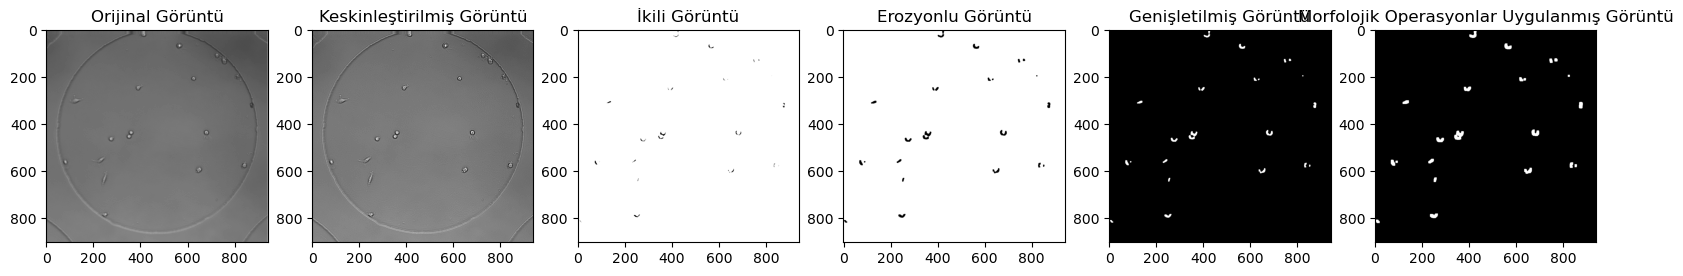

In [54]:
# 3.Adım: Morfolojik operasyonlar uygula (erozyon ve genişletme)
kernel_morphology = np.ones((5, 5), np.uint8)
eroded_image = cv2.erode(binary_image, kernel_morphology, iterations=1)
bitwise_not = cv2.bitwise_not(eroded_image)
morphology_image = cv2.dilate(bitwise_not, kernel_morphology, iterations=1)

# Görüntüleri göster
plt.figure(figsize=(20, 5))
plt.subplot(1, 6, 1), plt.imshow(original_image, cmap='gray'), plt.title('Orijinal Görüntü')
plt.subplot(1, 6, 2), plt.imshow(sharp_image, cmap='gray'), plt.title('Keskinleştirilmiş Görüntü')
plt.subplot(1, 6, 3), plt.imshow(binary_image, cmap='gray'), plt.title('İkili Görüntü')
plt.subplot(1, 6, 4), plt.imshow(eroded_image, cmap='gray'), plt.title('Erozyonlu Görüntü')
plt.subplot(1, 6, 5), plt.imshow(bitwise_not, cmap='gray'), plt.title('Genişletilmiş Görüntü')
plt.subplot(1, 6, 6), plt.imshow(morphology_image, cmap='gray'), plt.title('Morfolojik Operasyonlar Uygulanmış Görüntü')
plt.show()

In [55]:
# 4.Adım: Bağlantı bileşen etiketleme algoritması uygula
_, labeled_image, stats, centroids = cv2.connectedComponentsWithStats(morphology_image)



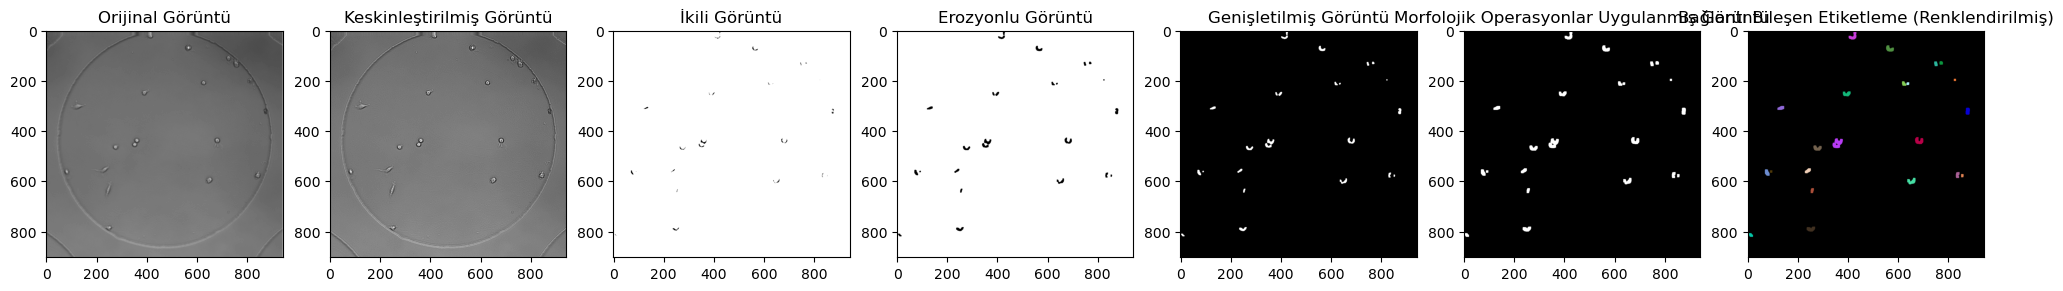

In [56]:
# 5.Adım: Farklı renklere boyama
colors = np.random.randint(0, 255, size=(len(stats), 3), dtype=np.uint8)
colored_image = np.zeros_like(cv2.cvtColor(morphology_image, cv2.COLOR_GRAY2BGR))

for label in range(1, len(stats)):
    mask = labeled_image == label
    colored_image[mask] = colors[label]

# Arka planı siyah yap
colored_image[morphology_image == 0] = [0, 0, 0]

# Görüntüleri göster
plt.figure(figsize=(25, 5))
plt.subplot(1, 7, 1), plt.imshow(original_image, cmap='gray'), plt.title('Orijinal Görüntü')
plt.subplot(1, 7, 2), plt.imshow(sharp_image, cmap='gray'), plt.title('Keskinleştirilmiş Görüntü')
plt.subplot(1, 7, 3), plt.imshow(binary_image, cmap='gray'), plt.title('İkili Görüntü')
plt.subplot(1, 7, 4), plt.imshow(eroded_image, cmap='gray'), plt.title('Erozyonlu Görüntü')
plt.subplot(1, 7, 5), plt.imshow(bitwise_not, cmap='gray'), plt.title('Genişletilmiş Görüntü')
plt.subplot(1, 7, 6), plt.imshow(morphology_image, cmap='gray'), plt.title('Morfolojik Operasyonlar Uygulanmış Görüntü')
plt.subplot(1, 7, 7), plt.imshow(cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB)), plt.title('Bağlantı Bileşen Etiketleme (Renklendirilmiş)')

plt.show()

In [57]:
# 6.Adım: Her bölge/nesne için alanı, yönü ve daireselliği hesapla
for i, stat in enumerate(stats[1:], start=1):  # İlk eleman genel istatistikleri temsil ettiği için 1'den başlıyoruz
    area = stat[4]  # Alan (Area)
    centroid = centroids[i]  # Ağırlık merkezi
    orientation = stat[-1]  # Yön (Orientation)

    # Daireselliği hesapla
    circularity = 4 * np.pi * area / (stat[2] ** 2)

    print(f"Nesne {i} - Alan: {area}, Yön: {orientation}, Dairesellik: {circularity}")


Nesne 1 - Alan: 647, Yön: 647, Dairesellik: 8.460397281467621
Nesne 2 - Alan: 534, Yön: 534, Dairesellik: 6.982769935554421
Nesne 3 - Alan: 233, Yön: 233, Dairesellik: 14.938593638498403
Nesne 4 - Alan: 181, Yön: 181, Dairesellik: 11.60465857754597
Nesne 5 - Alan: 81, Yön: 81, Dairesellik: 12.566370614359172
Nesne 6 - Alan: 246, Yön: 246, Dairesellik: 10.696633810146562
Nesne 7 - Alan: 115, Yön: 115, Dairesellik: 11.943244798771115
Nesne 8 - Alan: 480, Yön: 480, Dairesellik: 6.276647133082625
Nesne 9 - Alan: 348, Yön: 348, Dairesellik: 5.998761280928658
Nesne 10 - Alan: 428, Yön: 428, Dairesellik: 18.610403539604587
Nesne 11 - Alan: 674, Yön: 674, Dairesellik: 7.777533327895392
Nesne 12 - Alan: 1081, Yön: 1081, Dairesellik: 8.081050942368986
Nesne 13 - Alan: 523, Yön: 523, Dairesellik: 6.0350889176398965
Nesne 14 - Alan: 330, Yön: 330, Dairesellik: 7.199483164476608
Nesne 15 - Alan: 384, Yön: 384, Dairesellik: 13.366998105024715
Nesne 16 - Alan: 98, Yön: 98, Dairesellik: 12.31504320207

In [58]:
# 7.Adım: Her bileşen için öznitelikleri hesaplayın
for label in range(1, np.max(labeled_image)+1):
    alan = np.sum(labeled_image == label)
    kontur, _ = cv2.findContours((labeled_image == label).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cevre = cv2.arcLength(kontur[0], True)  
    kompaktlik = 4 * np.pi * alan / (cevre ** 2)    
    print(f'Bileşen {label}: Alan = {alan}, Çevre = {cevre}, Kompaktlık = {kompaktlik}')
   

Bileşen 1: Alan = 647, Çevre = 132.28427076339722, Kompaktlık = 0.46461981717594214
Bileşen 2: Alan = 534, Çevre = 104.62741661071777, Kompaktlık = 0.612999495025997
Bileşen 3: Alan = 233, Çevre = 57.899494767189026, Kompaktlık = 0.873406132420128
Bileşen 4: Alan = 181, Çevre = 49.071067690849304, Kompaktlık = 0.9445771248741462
Bileşen 5: Alan = 81, Çevre = 32.0, Kompaktlık = 0.9940195505498954
Bileşen 6: Alan = 246, Çevre = 61.31370830535889, Kompaktlık = 0.8222990798421438
Bileşen 7: Alan = 115, Çevre = 37.65685415267944, Kompaktlık = 1.019106641201015
Bileşen 8: Alan = 480, Çevre = 102.5269113779068, Kompaktlık = 0.5738195657733831
Bileşen 9: Alan = 348, Çevre = 74.97056245803833, Kompaktlık = 0.778050112353348
Bileşen 10: Alan = 428, Çevre = 79.55634880065918, Kompaktlık = 0.849774993122393
Bileşen 11: Alan = 674, Çevre = 130.5269112586975, Kompaktlık = 0.4971296179380223
Bileşen 12: Alan = 1081, Çevre = 153.25483322143555, Kompaktlık = 0.5783719180943064
Bileşen 13: Alan = 523, Ç

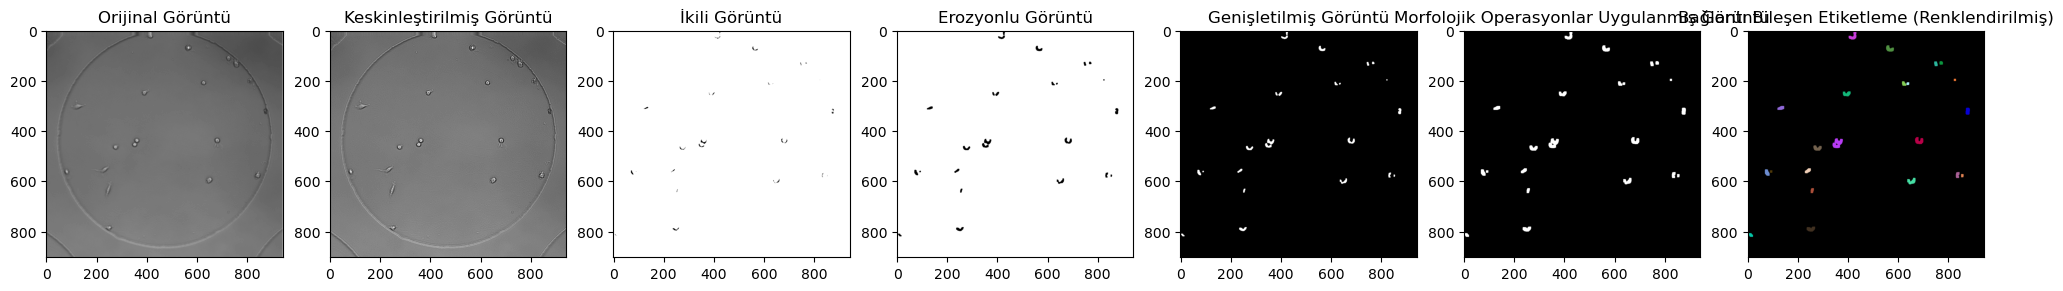

In [61]:
#SONUÇ


plt.figure(figsize=(25, 5))
plt.subplot(1, 7, 1), plt.imshow(original_image, cmap='gray'), plt.title('Orijinal Görüntü')
plt.subplot(1, 7, 2), plt.imshow(sharp_image, cmap='gray'), plt.title('Keskinleştirilmiş Görüntü')
plt.subplot(1, 7, 3), plt.imshow(binary_image, cmap='gray'), plt.title('İkili Görüntü')
plt.subplot(1, 7, 4), plt.imshow(eroded_image, cmap='gray'), plt.title('Erozyonlu Görüntü')
plt.subplot(1, 7, 5), plt.imshow(bitwise_not, cmap='gray'), plt.title('Genişletilmiş Görüntü')
plt.subplot(1, 7, 6), plt.imshow(morphology_image, cmap='gray'), plt.title('Morfolojik Operasyonlar Uygulanmış Görüntü')
plt.subplot(1, 7, 7), plt.imshow(cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB)), plt.title('Bağlantı Bileşen Etiketleme (Renklendirilmiş)')

plt.show()